---
**This notebook uses the Python 3.5 kernel.**  

---

# Setup

In [1]:
%matplotlib inline
import timeit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("NumPy   %s" % np.__version__)
print("Seaborn %s" % sns.__version__)

NumPy   1.12.1
Seaborn 0.7.1


In [3]:
# Set values to expand lists
vals = list(np.geomspace(10, 1000000, num=6, dtype='int'))

# timeit example
[timeit.timeit('range(%d)' % num) for num in vals]

[0.47897576699870115,
 0.3278958499995497,
 0.3077064409990271,
 0.3326416620002419,
 0.32053259600070305,
 0.3064402780000819]

---

# Plot Functions

In [4]:
def my_plot1(vals, slow_times, fast_times, title="", ylabel="", xlabel=""):
    '''
    Function to plot slow vs fast times with legend.
    '''
    plt.plot(np.log10(vals), slow_times);
    plt.plot(np.log10(vals), fast_times);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.xticks(range(1,6));
    plt.legend(['slow', 'fast'])

In [5]:
def my_plot2(slow_times, fast_times, title="", ylabel="", xlabel=""):
    '''
    Function to plot slow vs fast times with legend.
    '''
    # Setup
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ind = np.arange(6)                
    width = 0.35
    # Plots
    bar1 = ax.bar(ind, slow_times, width, color='darkblue', log=True)
    bar2 = ax.bar(ind+width, fast_times, width, color='darkgreen', log=True)
    ax.legend( (bar1[0], bar2[0]), ('slow', 'fast') );
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

---

# Looping Over A Collection

In [6]:
# Looping over a collection
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [colors[i] for i in range(len(colors))]        
    else:
        print('\nBetter')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [color for color in colors]

Bad
100000 loops, best of 3: 3.97 µs per loop
10000 loops, best of 3: 26.9 µs per loop
1000 loops, best of 3: 270 µs per loop
100 loops, best of 3: 2.78 ms per loop
10 loops, best of 3: 27.7 ms per loop
1 loop, best of 3: 287 ms per loop

Better
100000 loops, best of 3: 2.36 µs per loop
100000 loops, best of 3: 12.9 µs per loop
10000 loops, best of 3: 105 µs per loop
1000 loops, best of 3: 1.22 ms per loop
100 loops, best of 3: 12 ms per loop
10 loops, best of 3: 121 ms per loop


In [7]:
def slow_collection():
    out = [timeit.timeit("[colors[i] for i in range(len(colors))]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_collection():
    out = [timeit.timeit("[color for color in colors]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [8]:
sc = slow_collection()
fc = fast_collection()

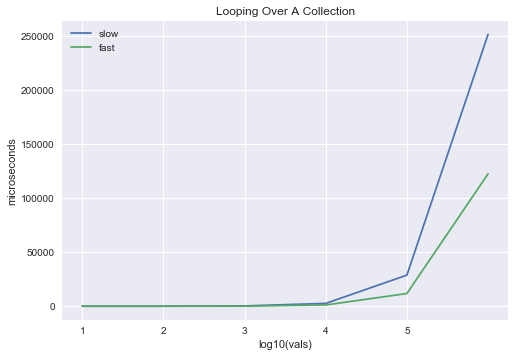

In [9]:
my_plot1(vals, sc, fc, 
        title="Looping Over A Collection", 
        xlabel="log10(vals)", 
        ylabel="microseconds")

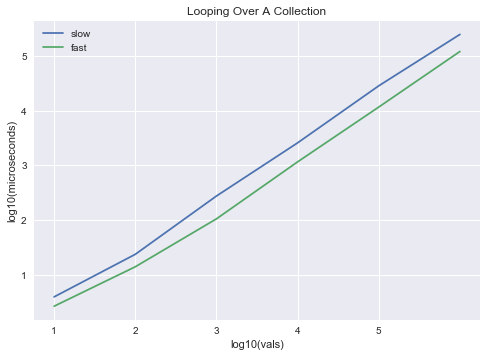

In [10]:
my_plot1(vals, np.log10(sc), np.log10(fc), 
        title="Looping Over A Collection", 
        xlabel="log10(vals)", 
        ylabel="log10(microseconds)")

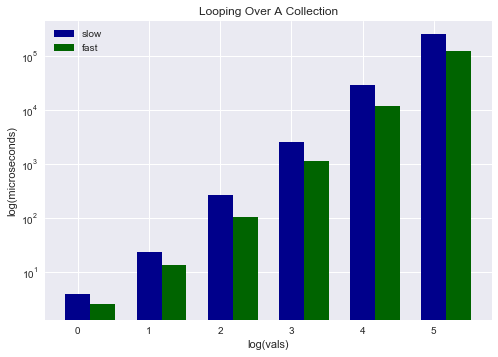

In [11]:
my_plot2(sc, fc, title="Looping Over A Collection", 
         xlabel='log(vals)', 
         ylabel="log(microseconds)")

---

# Sorting Lists

In [12]:
# Sorting lists
for choice in ['range', 'reversed']:   
    if choice is 'range':
        print('range')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [colors[i] for i in range(len(colors)-1, -1, -1)]     
    else:
        print('\nreversed')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [color for color in reversed(colors)]

range
100000 loops, best of 3: 3.85 µs per loop
10000 loops, best of 3: 27.2 µs per loop
1000 loops, best of 3: 256 µs per loop
100 loops, best of 3: 2.83 ms per loop
10 loops, best of 3: 28.4 ms per loop
1 loop, best of 3: 300 ms per loop

reversed
100000 loops, best of 3: 2.44 µs per loop
100000 loops, best of 3: 14.5 µs per loop
10000 loops, best of 3: 120 µs per loop
1000 loops, best of 3: 1.52 ms per loop
100 loops, best of 3: 13.9 ms per loop
10 loops, best of 3: 141 ms per loop


In [13]:
def slow_sort():
    out = [timeit.timeit("[colors[i] for i in range(len(colors)-1, -1, -1)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_sort():
    out = [timeit.timeit("[color for color in reversed(colors)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [14]:
ss = slow_sort()
fs = fast_sort()

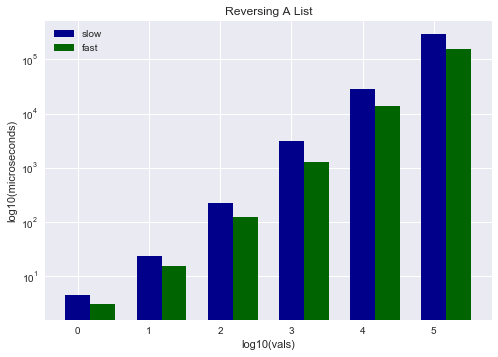

In [15]:
my_plot2(ss, fs, 
        title="Reversing A List", 
        xlabel="log10(vals)", 
        ylabel="log10(microseconds)")

---

# Looping Over A Collection & Indices

In [16]:
# Looping over a collection and indices
for choice in ['range', 'enumerate']:   
    if choice is 'range':
        print('range')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [(i, colors[i]) for i in range(len(colors))]
        
    else:
        print('\nenumerate')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [(i, colors[i]) for i, color in enumerate(colors)]

range
100000 loops, best of 3: 5 µs per loop
10000 loops, best of 3: 38.7 µs per loop
1000 loops, best of 3: 457 µs per loop
100 loops, best of 3: 5.08 ms per loop
10 loops, best of 3: 71.9 ms per loop
1 loop, best of 3: 707 ms per loop

enumerate
100000 loops, best of 3: 5.33 µs per loop
10000 loops, best of 3: 43.7 µs per loop
1000 loops, best of 3: 500 µs per loop
100 loops, best of 3: 5.88 ms per loop
10 loops, best of 3: 74.7 ms per loop
1 loop, best of 3: 877 ms per loop


In [17]:
def slow_collection_indices():
    out = [timeit.timeit("[(i, colors[i]) for i in range(len(colors))]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_collection_indices():
    out = [timeit.timeit("[(i, colors[i]) for i, color in enumerate(colors)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [18]:
sci = slow_collection_indices()
fci = fast_collection_indices()

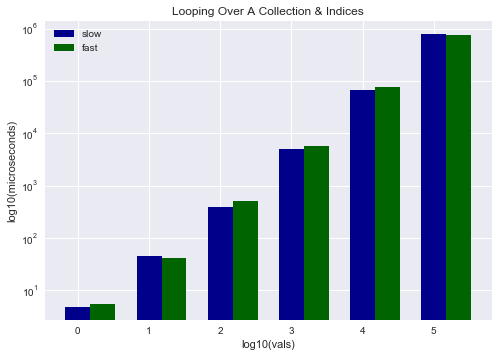

In [19]:
my_plot2(sci, fci, 
        title="Looping Over A Collection & Indices", 
        xlabel="log10(vals)", 
        ylabel="log10(microseconds)")

---

# Looping Over Two Collections

In [20]:
# Loop over two collections
for choice in ['range', 'zip']:   
    if choice is 'range':
        print('range')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            names = list('abcd')*val
            %timeit [(names[i], colors[i]) for i in range(min(len(names), len(colors)))]
    else:
        print('\nzip')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            names = list('abcd')*val
            %timeit [(name, color) for name, color in zip(names, colors)]

range
100000 loops, best of 3: 7.55 µs per loop
10000 loops, best of 3: 57.6 µs per loop
1000 loops, best of 3: 613 µs per loop
100 loops, best of 3: 7.66 ms per loop
10 loops, best of 3: 78 ms per loop
1 loop, best of 3: 843 ms per loop

zip
100000 loops, best of 3: 4.34 µs per loop
10000 loops, best of 3: 32.5 µs per loop
1000 loops, best of 3: 326 µs per loop
100 loops, best of 3: 3.77 ms per loop
10 loops, best of 3: 48.1 ms per loop
1 loop, best of 3: 541 ms per loop


---

# Appending Strings

In [21]:
# Appending Strings
my_string = ""
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('+=')
        for val in vals:
            mylist = list('abcdefghijklmnopqrstuvwxyz')*val
            %time for item in mylist: my_string += item
    else:
        print('\n.join')
        for val in vals:
            mylist = list('abcdefghijklmnopqrstuvwxyz')*val
            %time my_string = "".join([item for item in mylist])

+=
CPU times: user 101 µs, sys: 4 µs, total: 105 µs
Wall time: 115 µs
CPU times: user 604 µs, sys: 0 ns, total: 604 µs
Wall time: 609 µs
CPU times: user 7.56 ms, sys: 422 µs, total: 7.98 ms
Wall time: 7.87 ms
CPU times: user 59.8 ms, sys: 1.08 ms, total: 60.9 ms
Wall time: 61.9 ms
CPU times: user 614 ms, sys: 5.48 ms, total: 620 ms
Wall time: 623 ms
CPU times: user 6.24 s, sys: 76.7 ms, total: 6.31 s
Wall time: 6.43 s

.join
CPU times: user 24 µs, sys: 2.97 ms, total: 3 ms
Wall time: 3 ms
CPU times: user 99 µs, sys: 0 ns, total: 99 µs
Wall time: 102 µs
CPU times: user 888 µs, sys: 2 µs, total: 890 µs
Wall time: 892 µs
CPU times: user 9.46 ms, sys: 821 µs, total: 10.3 ms
Wall time: 10.2 ms
CPU times: user 96.8 ms, sys: 18.1 ms, total: 115 ms
Wall time: 115 ms
CPU times: user 939 ms, sys: 141 ms, total: 1.08 s
Wall time: 1.08 s


---

# Using Standard Library

In [22]:
# Standard Library

for choice in ['listexp', 'map']:   
    if choice is 'listexp':
        print('listexp')
        newlist = []
        for val in vals:
            %timeit [np.cumsum(item) for item in range(val)]
    else:
        print('\nmap')
        newlist = []
        for val in vals:
            %timeit newlist = map(np.cumsum, range(val))

listexp
10000 loops, best of 3: 60 µs per loop
1000 loops, best of 3: 693 µs per loop
100 loops, best of 3: 5.97 ms per loop
10 loops, best of 3: 58.9 ms per loop
1 loop, best of 3: 585 ms per loop
1 loop, best of 3: 5.93 s per loop

map
The slowest run took 6.09 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 511 ns per loop
The slowest run took 4.17 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 517 ns per loop
1000000 loops, best of 3: 588 ns per loop
The slowest run took 4.03 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 565 ns per loop
The slowest run took 5.32 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 554 ns per loop
1000000 loops, best of 3: 554 ns per loop


---

# Listexp vs Genexp

In [23]:
# listexp vs genexp

for choice in ['listexp', 'genexp']:   
    if choice is 'listexp':
        print('listexp')
        for val in vals:
            %timeit [np.cumsum(item) for item in range(val)] # list expression
    else:
        print('\ngenexp')
        for val in vals:
            %timeit (np.cumsum(item) for item in range(val)) # generator expression

listexp
10000 loops, best of 3: 59.3 µs per loop
1000 loops, best of 3: 588 µs per loop
100 loops, best of 3: 5.84 ms per loop
10 loops, best of 3: 58.3 ms per loop
1 loop, best of 3: 589 ms per loop
1 loop, best of 3: 5.86 s per loop

genexp
1000000 loops, best of 3: 688 ns per loop
1000000 loops, best of 3: 666 ns per loop
1000000 loops, best of 3: 723 ns per loop
The slowest run took 4.48 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 700 ns per loop
1000000 loops, best of 3: 706 ns per loop
1000000 loops, best of 3: 726 ns per loop


---

# Dots

In [24]:
# Dots matter (marginally)
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        newlist = []
        for val in vals:
            %timeit newlist.append(np.cumsum(val))
    else:
        print('\nBetter')
        newlist = []
        cumsum = np.cumsum
        append = newlist.append
        for val in vals:
            %timeit append(cumsum(val))

Bad
The slowest run took 8.95 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.54 µs per loop
The slowest run took 4.88 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.57 µs per loop
The slowest run took 4.94 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.54 µs per loop
The slowest run took 4.34 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.56 µs per loop
The slowest run took 7.85 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.53 µs per loop
The slowest run took 4.57 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.53 µs per loop

Better
The slowest run took 13.02 t

## Links
[4 Performance Optimization Tips For Faster Python Code](http://blog.hackerearth.com/4-Performance-Optimization-Tips-Faster-Python-Code)  
[PythonSpeed Performance Tips](https://wiki.python.org/moin/PythonSpeed/PerformanceTips)  
[6 Python Performance Tips](https://dzone.com/articles/6-python-performance-tips)